# 9. Linear Algebra
https://docs.scipy.org/doc/scipy/reference/tutorial/index.html   
https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

In [135]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/wei/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rank', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


When SciPy is built using the optimized ATLAS LAPACK and BLAS libraries, it has very fast linear algebra capabilities. If you dig deep enough, all of the raw lapack and blas libraries are available for your use for even more speed. In this section, some easier-to-use interfaces to these routines are described.

All of these linear algebra routines expect an object that can be converted into a 2-dimensional array. The output of these routines is also a two-dimensional array.

## scipy.linalg vs numpy.linalg
scipy.linalg contains all the functions in numpy.linalg. plus some other more advanced ones not contained in numpy.linalg

Another advantage of using scipy.linalg over numpy.linalg is that it is always compiled with BLAS/LAPACK support, while for numpy this is optional. Therefore, the scipy version might be faster depending on how numpy was installed.

Therefore, unless you don’t want to add scipy as a dependency to your numpy program, use scipy.linalg instead of numpy.linalg

## numpy.matrix vs 2D numpy.ndarray
The classes that represent matrices, and basic operations such as matrix multiplications and transpose are a part of numpy. For convenience, we summarize the differences between numpy.matrix and numpy.ndarray here.

***numpy.matrix*** is matrix class that has a more convenient interface than numpy.ndarray for matrix operations. This class supports for example MATLAB-like creation syntax via the, has matrix multiplication as default for the * operator, and contains I and T members that serve as shortcuts for inverse and transpose:

In [136]:
import numpy as np
A = np.mat('[1 2;3 4]')
A

matrix([[1, 2],
        [3, 4]])

In [137]:
A.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [138]:
b = np.mat('[5 6]')
b

matrix([[5, 6]])

In [139]:
b.T

matrix([[5],
        [6]])

In [140]:
A*b.T

matrix([[17],
        [39]])

Despite its convenience, ***the use of the numpy.matrix class is discouraged***, since it adds nothing that cannot be accomplished with 2D numpy.ndarray objects, and may lead to a confusion of which class is being used. For example, the above code can be rewritten as:

In [141]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [142]:
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [143]:
b = np.array([[5,6]]) #2D array
b

array([[5, 6]])

In [144]:
b.T

array([[5],
       [6]])

In [145]:
A*b #not matrix multiplication!

array([[ 5, 12],
       [15, 24]])

In [146]:
A.dot(b.T) #matrix multiplication

array([[17],
       [39]])

In [147]:
b = np.array([5,6]) #1D array
b

array([5, 6])

In [148]:
b.T  #not matrix transpose!

array([5, 6])

In [149]:
A.dot(b)  #does not matter for multiplication

array([17, 39])

## Basic routines
### Finding Inverse

The inverse of a matrix A is the matrix B such that AB=I where I is the identity matrix consisting of ones down the main diagonal. Usually B is denoted $B=A^{-1}$ . In SciPy, the matrix inverse of the Numpy array, A, is obtained using linalg.inv (A) , or using A.I if A is a Matrix. For example, let
> $\begin{split}\mathbf{A} = \left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]\end{split}$

then

> $\begin{split}\mathbf{A^{-1}} = \frac{1}{25}
    \left[\begin{array}{ccc} -37 & 9 & 22 \\
                              14 & 2 & -9 \\
                              4 & -3 & 1
          \end{array}\right] = %
     \left[\begin{array}{ccc} -1.48 & 0.36 & 0.88  \\
                               0.56 & 0.08 & -0.36 \\
                               0.16 & -0.12 & 0.04
           \end{array}\right].\end{split}$
           
The following example demonstrates this computation in SciPy           

In [150]:
import numpy as np
from scipy import linalg
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [151]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [152]:
A.dot(linalg.inv(A)) #double check

array([[  1.00000000e+00,  -1.11022302e-16,  -5.55111512e-17],
       [  3.05311332e-16,   1.00000000e+00,   1.87350135e-16],
       [  2.22044605e-16,  -1.11022302e-16,   1.00000000e+00]])

## Solving linear system

Solving linear systems of equations is straightforward using the scipy command ***linalg.solve***. This command expects an input matrix and a right-hand-side vector. The solution vector is then computed. An option for entering a symmetric matrix is offered which can speed up the processing when applicable. As an example, suppose it is desired to solve the following simultaneous equations:
> $\begin{eqnarray*} x + 3y + 5z & = & 10 \\
                   2x + 5y + z & = & 8  \\
                   2x + 3y + 8z & = & 3
 \end{eqnarray*}$
 
We could find the solution vector using a matrix inverse:
> $\begin{split}\left[\begin{array}{c} x\\ y\\ z\end{array}\right]=\left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]^{-1}\left[\begin{array}{c} 10\\ 8\\ 3\end{array}\right]=\frac{1}{25}\left[\begin{array}{c} -232\\ 129\\ 19\end{array}\right]=\left[\begin{array}{c} -9.28\\ 5.16\\ 0.76\end{array}\right].\end{split}$

However, it is better to use the linalg.solve command which can be faster and more numerically stable. In this case it however gives the same answer as shown in the following example:

In [153]:
import numpy as np
from scipy import linalg
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [154]:
b = np.array([[5], [6]])
b

array([[5],
       [6]])

In [155]:
linalg.inv(A).dot(b)  # slow

array([[-4. ],
       [ 4.5]])

In [156]:
A.dot(linalg.inv(A).dot(b)) - b  # check

array([[ 0.],
       [ 0.]])

In [157]:
np.linalg.solve(A, b)  # fast

array([[-4. ],
       [ 4.5]])

In [158]:
A.dot(np.linalg.solve(A, b)) - b  # check

array([[ 0.],
       [ 0.]])

## Finding Determinant

The determinant of a square matrix AA is often denoted |A| and is a quantity often used in linear algebra. Suppose $a_{ij}$ are the elements of the matrix A and let Mij=∣∣Aij∣be the determinant of the matrix left by removing the $i^{th}$ row and $j^{th}$ column from A . Then for any row i,
>$\left|\mathbf{A}\right|=\sum_{j}\left(-1\right)^{i+j}a_{ij}M_{ij}.$

This is a recursive way to define the determinant where the base case is defined by accepting that the determinant of a 1×1 matrix is the only matrix element. In SciPy the determinant can be calculated with ***linalg.det*** . For example, the determinant of
> $\begin{split}\mathbf{A=}\left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]\end{split}$

is
> $ \begin{eqnarray*} \left|\mathbf{A}\right| & = & 1\left|\begin{array}{cc} 5 & 1\\ 3 & 8\end{array}\right|-3\left|\begin{array}{cc} 2 & 1\\ 2 & 8\end{array}\right|+5\left|\begin{array}{cc} 2 & 5\\ 2 & 3\end{array}\right|\\  & = & 1\left(5\cdot8-3\cdot1\right)-3\left(2\cdot8-2\cdot1\right)+5\left(2\cdot3-2\cdot5\right)=-25.\end{eqnarray*}$

In SciPy this is computed as shown in this example:

In [159]:
import numpy as np
from scipy import linalg
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [160]:
linalg.det(A)

-25.000000000000004

## Computing norms

Matrix and vector norms can also be computed with SciPy. A wide range of norm definitions are available using different parameters to the order argument of ***linalg.norm*** . This function takes a rank-1 (vectors) or a rank-2 (matrices) array and an optional order argument (default is 2). Based on these inputs a vector or matrix norm of the requested order is computed.

For vector x , the order parameter can be any real number including inf or -inf. The computed norm is
> $\begin{split}\left\Vert \mathbf{x}\right\Vert =\left\{ \begin{array}{cc} \max\left|x_{i}\right| & \textrm{ord}=\textrm{inf}\\ \min\left|x_{i}\right| & \textrm{ord}=-\textrm{inf}\\ \left(\sum_{i}\left|x_{i}\right|^{\textrm{ord}}\right)^{1/\textrm{ord}} & \left|\textrm{ord}\right|<\infty.\end{array}\right.\end{split}$

For matrix A the only valid values for norm are ±2,±1, ±inf, and ‘fro’ (or ‘f’) Thus,
> $\begin{split}\left\Vert \mathbf{A}\right\Vert =\left\{ \begin{array}{cc} \max_{i}\sum_{j}\left|a_{ij}\right| & \textrm{ord}=\textrm{inf}\\ \min_{i}\sum_{j}\left|a_{ij}\right| & \textrm{ord}=-\textrm{inf}\\ \max_{j}\sum_{i}\left|a_{ij}\right| & \textrm{ord}=1\\ \min_{j}\sum_{i}\left|a_{ij}\right| & \textrm{ord}=-1\\ \max\sigma_{i} & \textrm{ord}=2\\ \min\sigma_{i} & \textrm{ord}=-2\\ \sqrt{\textrm{trace}\left(\mathbf{A}^{H}\mathbf{A}\right)} & \textrm{ord}=\textrm{'fro'}\end{array}\right.\end{split}$

where σi are the singular values of A .

Examples:

In [161]:
import numpy as np
from scipy import linalg
A=np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [162]:
linalg.norm(A)

5.4772255750516612

In [163]:
linalg.norm(A,'fro') # frobenius norm is the default

5.4772255750516612

In [164]:
linalg.norm(A,1) # L1 norm (max column sum)

6.0

In [165]:
linalg.norm(A,-1)

4.0

In [166]:
linalg.norm(A,np.inf) # L inf norm (max row sum)

7.0

## Solving linear least-squares problems and pseudo-inverses

Linear least-squares problems occur in many branches of applied mathematics. In this problem a set of linear scaling coefficients is sought that allow a model to fit data. In particular it is assumed that data yi is related to data xi through a set of coefficients cj and model functions fj(xi) via the model
> $y_{i}=\sum_{j}c_{j}f_{j}\left(\mathbf{x}_{i}\right)+\epsilon_{i}$

where ϵi represents uncertainty in the data. The strategy of least squares is to pick the coefficients cj to minimize
>$J\left(\mathbf{c}\right)=\sum_{i}\left|y_{i}-\sum_{j}c_{j}f_{j}\left(x_{i}\right)\right|^{2}.$

Theoretically, a global minimum will occur when
>$\frac{\partial J}{\partial c_{n}^{*}}=0=\sum_{i}\left(y_{i}-\sum_{j}c_{j}f_{j}\left(x_{i}\right)\right)\left(-f_{n}^{*}\left(x_{i}\right)\right)$

or
>$\begin{eqnarray*} \sum_{j}c_{j}\sum_{i}f_{j}\left(x_{i}\right)f_{n}^{*}\left(x_{i}\right) & = & \sum_{i}y_{i}f_{n}^{*}\left(x_{i}\right)\\ \mathbf{A}^{H}\mathbf{Ac} & = & \mathbf{A}^{H}\mathbf{y}\end{eqnarray*}$

where
>$\left\{ \mathbf{A}\right\} _{ij}=f_{j}\left(x_{i}\right).$

When $\mathbf{A^{H}A}$ is invertible, then
>$\mathbf{c}=\left(\mathbf{A}^{H}\mathbf{A}\right)^{-1}\mathbf{A}^{H}\mathbf{y}=\mathbf{A}^{\dagger}\mathbf{y}$

where A† is called the ***pseudo-inverse*** of A. Notice that using this definition of A the model can be written
>$\mathbf{y}=\mathbf{Ac}+\boldsymbol{\epsilon}.$

The command ***linalg.lstsq*** will solve the linear least squares problem for c given A and y . In addition ***linalg.pinv*** or ***linalg.pinv2*** (uses a different method based on singular value decomposition) will find A† given A.

The following example and figure demonstrate the use of linalg.lstsq and linalg.pinv for solving a data-fitting problem. The data shown below were generated using the model:
>$y_{i}=c_{1}e^{-x_{i}}+c_{2}x_{i}$

where xi=0.1i for i=1…10, c1=5, and c2=2. Noise is added to yi and the coefficients c1 and c2 are estimated using linear least squares.

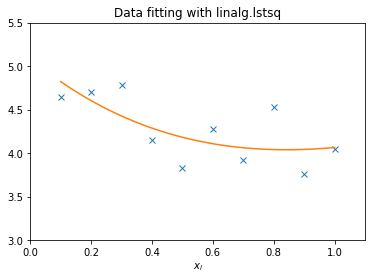

In [167]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

c1, c2 = 5.0, 2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))  # noise

A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

### Generalized inverse

The generalized inverse is calculated using the command ***linalg.pinv*** or ***linalg.pinv2***. These two commands differ in how they compute the generalized inverse. The first uses the linalg.lstsq algorithm while the second uses singular value decomposition. Let A be an M×N matrix, then if M>N the generalized inverse is
>$\mathbf{A}^{\dagger}=\left(\mathbf{A}^{H}\mathbf{A}\right)^{-1}\mathbf{A}^{H}$

while if $M<N$ matrix the generalized inverse is
>$\mathbf{A}^{\#}=\mathbf{A}^{H}\left(\mathbf{A}\mathbf{A}^{H}\right)^{-1}.$

In both cases for M=N, then
>$\mathbf{A}^{\dagger}=\mathbf{A}^{\#}=\mathbf{A}^{-1}$

as long as A is invertible.

## Decompositions
In many applications it is useful to decompose a matrix using other representations. There are several decompositions supported by SciPy.

### Eigenvalues and eigenvectors

The eigenvalue-eigenvector problem is one of the most commonly employed linear algebra operations. In one popular form, the eigenvalue-eigenvector problem is to find for some square matrix A scalars λ and corresponding vectors v such that
>$\mathbf{Av}=\lambda\mathbf{v}.$

For an $N×N$ matrix, there are N (not necessarily distinct) eigenvalues — roots of the (characteristic) polynomial
>$\left|\mathbf{A}-\lambda\mathbf{I}\right|=0.$

The eigenvectors, $\mathbf{v}$ , are also sometimes called ***right eigenvectors*** to distinguish them from another set of left eigenvectors that satisfy
>$\mathbf{v}_{L}^{H}\mathbf{A}=\lambda\mathbf{v}_{L}^{H}$

or
>$\mathbf{A}^{H}\mathbf{v}_{L}=\lambda^{*}\mathbf{v}_{L}.$

With it’s default optional arguments, the command ***linalg.eig*** returns λ and v. However, it can also return $\mathbf{v}_{L}$ and just λ by itself ( linalg.eigvals returns just λ as well).

In addition, linalg.eig can also solve the more general eigenvalue problem
>$\begin{eqnarray*} \mathbf{Av} & = & \lambda\mathbf{Bv}\\ \mathbf{A}^{H}\mathbf{v}_{L} & = & \lambda^{*}\mathbf{B}^{H}\mathbf{v}_{L}\end{eqnarray*}$

for square matrices A and B. The standard eigenvalue problem is an example of the general eigenvalue problem for B=I. When a generalized eigenvalue problem can be solved, then it provides a decomposition of AA as
>$\mathbf{A}=\mathbf{BV}\boldsymbol{\Lambda}\mathbf{V}^{-1}$

where $V$ is the collection of eigenvectors into columns and $Λ$ is a diagonal matrix of eigenvalues.

By definition, eigenvectors are only defined up to a constant scale factor. In SciPy, the scaling factor for the eigenvectors is chosen so that $\left\Vert \mathbf{v}\right\Vert
^{2}=\sum_{i}v_{i}^{2}=1.$

As an example, consider finding the eigenvalues and eigenvectors of the matrix
>$\begin{split}\mathbf{A}=\left[\begin{array}{ccc} 1 & 5 & 2\\ 2 & 4 & 1\\ 3 & 6 & 2\end{array}\right].\end{split}$

The characteristic polynomial is
>$\begin{eqnarray*} \left|\mathbf{A}-\lambda\mathbf{I}\right| & = & \left(1-\lambda\right)\left[\left(4-\lambda\right)\left(2-\lambda\right)-6\right]-\\  &  & 5\left[2\left(2-\lambda\right)-3\right]+2\left[12-3\left(4-\lambda\right)\right]\\  & = & -\lambda^{3}+7\lambda^{2}+8\lambda-3.\end{eqnarray*}$

The roots of this polynomial are the eigenvalues of A :
>$\begin{eqnarray*} \lambda_{1} & = & 7.9579\\ \lambda_{2} & = & -1.2577\\ \lambda_{3} & = & 0.2997.\end{eqnarray*}$

The eigenvectors corresponding to each eigenvalue can be found using the original equation. The eigenvectors associated with these eigenvalues can then be found.

In [168]:
import numpy as np
from scipy import linalg

A = np.array([[1, 2], [3, 4]])
la, v = linalg.eig(A)
la

array([-0.37228132+0.j,  5.37228132+0.j])

In [169]:
v

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

In [170]:
l1, l2 = la
l1, l2  # eigenvalues

((-0.37228132326901431+0j), (5.3722813232690143+0j))

In [171]:
v[:, 0]   # first eigenvector

array([-0.82456484,  0.56576746])

In [172]:
v[:, 1]   # second eigenvector

array([-0.41597356, -0.90937671])

In [173]:
np.sum(abs(v**2), axis=0) # eigenvectors are unitary

array([ 1.,  1.])

In [174]:
v1 = np.array(v[:, 0]).T
v1

array([-0.82456484,  0.56576746])

In [175]:
linalg.norm(A.dot(v1) - l1*v1)  # check the computation

5.551115123125783e-17

### Singular value decomposition

Singular Value Decomposition (**SVD**) can be thought of as an extension of the eigenvalue problem to matrices that are not square. Let A be an M×N matrix with M and N arbitrary. The matrices $\mathbf{A}^{H}\mathbf{A}$ and $\mathbf{A}\mathbf{A}^{H}$ are square hermitian matrices [1] of size N×N and M×M respectively. It is known that the eigenvalues of square hermitian matrices are real and non-negative. In addition, there are at most min(M,N) identical non-zero eigenvalues of $\mathbf{A}^{H}\mathbf{A}$ and $\mathbf{A}\mathbf{A}^{H}$ . Define these positive eigenvalues as $\sigma_{i}^{2}.$. The square-root of these are called singular values of A. The eigenvectors of $\mathbf{A}^{H}\mathbf{A}$ are collected by columns into an N×N unitary [2] matrix V while the eigenvectors of $\mathbf{A}\mathbf{A}^{H}$ are collected by columns in the unitary matrix U , the singular values are collected in an M×N zero matrix Σ with main diagonal entries set to the singular values. Then
>$\mathbf{A=U}\boldsymbol{\Sigma}\mathbf{V}^{H}$

is the singular-value decomposition of $A$. Every matrix has a singular value decomposition. Sometimes, the singular values are called the ***spectrum*** of A. The command ***linalg.svd*** will return U , $V^H$ , and $σ_i$ as an array of the singular values. To obtain the matrix Σ use ***linalg.diagsvd***. The following example illustrates the use of linalg.svd .

In [176]:
import numpy as np
from scipy import linalg
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [177]:
M,N = A.shape
M,N

(2, 3)

In [178]:
U,s,Vh = linalg.svd(A)
U

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

In [179]:
s

array([ 9.508032  ,  0.77286964])

In [180]:
Vh

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [181]:
Sig = linalg.diagsvd(s,M,N)
Sig

array([[ 9.508032  ,  0.        ,  0.        ],
       [ 0.        ,  0.77286964,  0.        ]])

In [182]:
U.dot(Sig.dot(Vh)) #check computation

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

### LU decomposition

The LU decomposition finds a representation for the M×N matrix A as
>$\mathbf{A}=\mathbf{P}\,\mathbf{L}\,\mathbf{U}$

where $P$ is an M×M permutation matrix (a permutation of the rows of the identity matrix), L is in M×K lower triangular or trapezoidal matrix ($K=\min\left(M,N\right)$) with unit-diagonal, and U is an upper triangular or trapezoidal matrix. The SciPy command for this decomposition is ***linalg.lu*** .

Such a decomposition is often useful for solving many simultaneous equations where the left-hand-side does not change but the right hand side does. For example, suppose we are going to solve
>$\mathbf{A}\mathbf{x}_{i}=\mathbf{b}_{i}$

for many different $b_i$ . The LU decomposition allows this to be written as
>$\mathbf{PLUx}_{i}=\mathbf{b}_{i}.$

Because L is lower-triangular, the equation can be solved for Uxi and finally xi very rapidly using forward- and back-substitution. An initial time spent factoring A allows for very rapid solution of similar systems of equations in the future. If the intent for performing LU decomposition is for solving linear systems then the command ***linalg.lu_factor*** should be used followed by repeated applications of the command ***linalg.lu_solve*** to solve the system for each new right-hand-side.


### Cholesky decomposition

Cholesky decomposition is a special case of LU decomposition applicable to Hermitian positive definite matrices. When $\mathbf{A}=\mathbf{A}^{H}$ and $\mathbf{x}^{H}\mathbf{Ax}\geq0$ for all x , then decompositions of A can be found so that
>$\begin{eqnarray*} \mathbf{A} & = & \mathbf{U}^{H}\mathbf{U}\\ \mathbf{A} & = & \mathbf{L}\mathbf{L}^{H}\end{eqnarray*}$

where L is lower-triangular and UU is upper triangular. Notice that $\mathbf{L}=\mathbf{U}^{H}.$. The command ***linalg.cholesky*** computes the cholesky factorization. For using cholesky factorization to solve systems of equations there are also ***linalg.cho_factor*** and ***linalg.cho_solve*** routines that work similarly to their LU decomposition counterparts.


### QR decomposition

The QR decomposition (sometimes called a ***polar decomposition***) works for any M×N array and finds an M×M unitary matrix Q and an M×N upper-trapezoidal matrix RR such that
>$\mathbf{A=QR}.$

Notice that if the SVD of A is known then the QR decomposition can be found
>$\mathbf{A}=\mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^{H}=\mathbf{QR}$

implies that $\mathbf{Q}=\mathbf{U}$ and $\mathbf{R}=\boldsymbol{\Sigma}\mathbf{V}^{H}.$. Note, however, that in SciPy independent algorithms are used to find QR and SVD decompositions. The command for QR decomposition is ***linalg.qr*** .


### Schur decomposition

For a square N×N matrix, A , the Schur decomposition finds (not-necessarily unique) matrices T and Z such that
>$\mathbf{A}=\mathbf{ZT}\mathbf{Z}^{H}$

where Z is a unitary matrix and T is either upper-triangular or quasi-upper triangular depending on whether or not a real schur form or complex schur form is requested. For a real schur form both T and Z are real-valued when A is real-valued. When A is a real-valued matrix the real schur form is only quasi-upper triangular because 2×2 blocks extrude from the main diagonal corresponding to any complex- valued eigenvalues. The command linalg.schur finds the Schur decomposition while the command linalg.rsf2csf converts T and Z from a real Schur form to a complex Schur form. The Schur form is especially useful in calculating functions of matrices.

The following example illustrates the schur decomposition:

In [183]:
from scipy import linalg

A = np.mat('[1 3 2; 1 4 5; 2 3 6]')
A

matrix([[1, 3, 2],
        [1, 4, 5],
        [2, 3, 6]])

In [184]:
T, Z = linalg.schur(A)
T, Z

(array([[ 9.90012467,  1.78947961, -0.65498528],
        [ 0.        ,  0.54993766, -1.57754789],
        [ 0.        ,  0.51260928,  0.54993766]]),
 array([[ 0.36702395, -0.85002495, -0.37782404],
        [ 0.63681656, -0.06646488,  0.76814522],
        [ 0.67805463,  0.52253231, -0.51691576]]))

In [185]:
T1, Z1 = linalg.schur(A, 'complex')
T1, Z1

(array([[ 9.90012467 +4.44089210e-16j,  1.58629653 -7.59468606e-02j,
         -0.24901757 +1.02329305e+00j],
        [ 0.00000000 +0.00000000e+00j,  0.54993766 +8.99258408e-01j,
          0.51778761 +9.30585972e-01j],
        [ 0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
          0.54993766 -8.99258408e-01j]]),
 array([[-0.36066189-0.06804102j,  0.72427090-0.23617942j,
         -0.53176194-0.04662187j],
        [-0.62577787-0.11805674j,  0.08310692+0.37568066j,
          0.33519530+0.57798448j],
        [-0.66630111-0.12570169j, -0.47009285-0.22499096j,
         -0.02697209-0.51759656j]]))

In [186]:
T2, Z2 = linalg.rsf2csf(T, Z)
T2, Z2

(array([[ 9.90012467 +0.00000000e+00j, -0.32436598 +1.55463542e+00j,
         -0.88619748 +5.69027615e-01j],
        [ 0.00000000 +0.00000000e+00j,  0.54993766 +8.99258408e-01j,
          1.06493862 +3.05311332e-16j],
        [ 0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
          0.54993766 -8.99258408e-01j]]),
 array([[ 0.36702395+0.j        , -0.18710843-0.73847105j,
          0.42095476+0.32823992j],
        [ 0.63681656+0.j        ,  0.38040577-0.05774229j,
          0.03291516-0.6673369j ],
        [ 0.67805463+0.j        , -0.25599031+0.45395724j,
         -0.25877178+0.44907779j]]))

In [187]:
abs(T1 - T2) # different

array([[  3.58036167e-15,   2.51185784e+00,   7.82531358e-01],
       [  0.00000000e+00,   4.96506831e-16,   1.07952048e+00],
       [  0.00000000e+00,   0.00000000e+00,   3.51083347e-16]])

In [188]:
abs(Z1 - Z2) # different

array([[ 0.73085996,  1.04062922,  1.02381174],
       [ 1.26810177,  0.52558735,  1.28148298],
       [ 1.35021971,  0.71190629,  0.99407767]])

In [189]:
T, Z, T1, Z1, T2, Z2 = map(np.mat,(T,Z,T1,Z1,T2,Z2))
abs(A - Z*T*Z.H)  # same

matrix([[  1.77635684e-15,   3.55271368e-15,   4.88498131e-15],
        [  2.22044605e-15,   3.55271368e-15,   6.21724894e-15],
        [  2.66453526e-15,   3.10862447e-15,   7.99360578e-15]])

In [190]:
abs(A - Z1*T1*Z1.H)  # same

matrix([[  6.66133815e-16,   4.89387476e-15,   2.70599070e-15],
        [  1.96183037e-15,   1.15548565e-14,   1.59875970e-14],
        [  2.35252041e-15,   1.15511223e-14,   1.77639153e-14]])

In [191]:
abs(A - Z2*T2*Z2.H)  # same

matrix([[  1.77982290e-15,   3.99682698e-15,   4.44097883e-15],
        [  1.77722399e-15,   3.55444798e-15,   6.22121276e-15],
        [  2.22044605e-15,   2.66453526e-15,   8.88178420e-15]])

### Interpolative Decomposition

scipy.linalg.interpolative contains routines for computing the interpolative decomposition (ID) of a matrix. For a matrix $A
\in \mathbb{C}^{m \times n}$ of rank $k \leq \min \{ m, n \}$ this is a factorization
>$\begin{split}A \Pi =
\begin{bmatrix}
 A \Pi_{1} & A \Pi_{2}
\end{bmatrix} =
A \Pi_{1}
\begin{bmatrix}
 I & T
\end{bmatrix},\end{split}$

where $\Pi = [\Pi_{1}, \Pi_{2}]$ is a permutation matrix with $\Pi_{1} \in \{ 0, 1 \}^{n \times k}$, i.e., $A \Pi_{2} =
A \Pi_{1} T$. This can equivalently be written as A=BP, where B=AΠ1 and P=[I,T]Π𝖳  are the ***skeleton*** and ***interpolation matrices***, respectively.

See also
scipy.linalg.interpolative — for more information.

## Matrix Functions
Consider the function f(x)f(x) with Taylor series expansion
>$f\left(x\right)=\sum_{k=0}^{\infty}\frac{f^{\left(k\right)}\left(0\right)}{k!}x^{k}.$

A matrix function can be defined using this Taylor series for the square matrix AA as
>$f\left(\mathbf{A}\right)=\sum_{k=0}^{\infty}\frac{f^{\left(k\right)}\left(0\right)}{k!}\mathbf{A}^{k}.$

While, this serves as a useful representation of a matrix function, it is rarely the best way to calculate a matrix function.


### Exponential and logarithm functions

The matrix exponential is one of the more common matrix functions. It can be defined for square matrices as
>$e^{\mathbf{A}}=\sum_{k=0}^{\infty}\frac{1}{k!}\mathbf{A}^{k}.$

The command linalg.expm3 uses this Taylor series definition to compute the matrix exponential. Due to poor convergence properties it is not often used.

Another method to compute the matrix exponential is to find an eigenvalue decomposition of A :
>$\mathbf{A}=\mathbf{V}\boldsymbol{\Lambda}\mathbf{V}^{-1}$

and note that
>$e^{\mathbf{A}}=\mathbf{V}e^{\boldsymbol{\Lambda}}\mathbf{V}^{-1}$

where the matrix exponential of the diagonal matrix $Λ$ is just the exponential of its elements. This method is implemented in ***linalg.expm2*** .

The preferred method for implementing the matrix exponential is to use scaling and a Padé approximation for $e^x$ . This algorithm is implemented as ***linalg.expm*** .

The inverse of the matrix exponential is the matrix logarithm defined as the inverse of the matrix exponential.
>$\mathbf{A}\equiv\exp\left(\log\left(\mathbf{A}\right)\right).$

The matrix logarithm can be obtained with linalg.logm .


### Trigonometric functions

The trigonometric functions sinsin , coscos , and tantan are implemented for matrices in ***linalg.sinm***, ***linalg.cosm***, and ***linalg.tanm*** respectively. The matrix sin and cosine can be defined using Euler’s identity as
>$\begin{eqnarray*} \sin\left(\mathbf{A}\right) & = & \frac{e^{j\mathbf{A}}-e^{-j\mathbf{A}}}{2j}\\ \cos\left(\mathbf{A}\right) & = & \frac{e^{j\mathbf{A}}+e^{-j\mathbf{A}}}{2}.\end{eqnarray*}$

The tangent is
>$\tan\left(x\right)=\frac{\sin\left(x\right)}{\cos\left(x\right)}=\left[\cos\left(x\right)\right]^{-1}\sin\left(x\right)$

and so the matrix tangent is defined as
>$\left[\cos\left(\mathbf{A}\right)\right]^{-1}\sin\left(\mathbf{A}\right).$


### Hyperbolic trigonometric functions

The hyperbolic trigonometric functions sinh , cosh , and tanh can also be defined for matrices using the familiar definitions:
>$\begin{eqnarray*} \sinh\left(\mathbf{A}\right) & = & \frac{e^{\mathbf{A}}-e^{-\mathbf{A}}}{2}\\ \cosh\left(\mathbf{A}\right) & = & \frac{e^{\mathbf{A}}+e^{-\mathbf{A}}}{2}\\ \tanh\left(\mathbf{A}\right) & = & \left[\cosh\left(\mathbf{A}\right)\right]^{-1}\sinh\left(\mathbf{A}\right).\end{eqnarray*}$

These matrix functions can be found using ***linalg.sinhm, linalg.coshm*** , and ***linalg.tanhm***.


### Arbitrary function

Finally, any arbitrary function that takes one complex number and returns a complex number can be called as a matrix function using the command ***linalg.funm***. This command takes the matrix and an arbitrary Python function. It then implements an algorithm from Golub and Van Loan’s book “Matrix Computations” to compute the function applied to the matrix using a Schur decomposition. Note that the function needs to accept complex numbers as input in order to work with this algorithm. For example the following code computes the zeroth-order Bessel function applied to a matrix.

In [192]:
from scipy import special, random, linalg
np.random.seed(1234)
A = random.rand(3, 3)
A

array([[ 0.19151945,  0.62210877,  0.43772774],
       [ 0.78535858,  0.77997581,  0.27259261],
       [ 0.27646426,  0.80187218,  0.95813935]])

In [193]:
B = linalg.funm(A, lambda x: special.jv(0, x))
B

array([[ 0.86511146, -0.19676526, -0.13856748],
       [-0.17479869,  0.7259118 , -0.16606258],
       [-0.19212044, -0.32052767,  0.73590704]])

In [194]:
linalg.eigvals(A)

array([ 1.73881510+0.j, -0.20270676+0.j,  0.39352627+0.j])

In [195]:
special.jv(0, linalg.eigvals(A))

array([ 0.37551908+0.j,  0.98975384+0.j,  0.96165739+0.j])

In [196]:
linalg.eigvals(B)

array([ 0.37551908+0.j,  0.98975384+0.j,  0.96165739+0.j])

Note how, by virtue of how matrix analytic functions are defined, the Bessel function has acted on the matrix eigenvalues.

## Special matrices
SciPy and NumPy provide several functions for creating special matrices that are frequently used in engineering and science.
```
Type	Function	Description
block diagonal	scipy.linalg.block_diag	Create a block diagonal matrix from the provided arrays.
circulant	scipy.linalg.circulant	Construct a circulant matrix.
companion	scipy.linalg.companion	Create a companion matrix.
Hadamard	scipy.linalg.hadamard	Construct a Hadamard matrix.
Hankel	scipy.linalg.hankel	Construct a Hankel matrix.
Hilbert	scipy.linalg.hilbert	Construct a Hilbert matrix.
Inverse Hilbert	scipy.linalg.invhilbert	Construct the inverse of a Hilbert matrix.
Leslie	scipy.linalg.leslie	Create a Leslie matrix.
Pascal	scipy.linalg.pascal	Create a Pascal matrix.
Toeplitz	scipy.linalg.toeplitz	Construct a Toeplitz matrix.
Van der Monde	numpy.vander	Generate a Van der Monde matrix.
```
For examples of the use of these functions, see their respective docstrings.